In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("/content/co2_emmision_train_data.csv")

data.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],...,Range 1 (km),Recharge Time (h),Fuel Type 2,Range 2 (km),Fuel Consumption [City (kWh/100 km)],Fuel Consumption [Comb (kWh/100 km)],Consumption [City (Le/100 km)],Consumption [Hwy (Le/100 km)],Consumption [Comb (Le/100 km)],Range (km)
0,2022.0,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.0,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0,Acura,MDX Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022.0,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022.0,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data sets containing information about 6756 vehicles. The fields are:



*  Year: The model year of the vehicle (all entries are from 2022).
*  Make: The manufacturer of the vehicle (all entries are Acura).
*  Model: The specific model of the vehicle (e.g., ILX, MDX SH-AWD).
*  Vehicle Class: The category of the vehicle (e.g., Compact, SUV: Small).
*  Engine Size (L): The volume of the engine in liters.
*  Cylinders: The number of cylinders in the vehicle's engine.
*  Transmission: Type of transmission (e.g., AM8 for 8-speed automated manual, AS10 for 10-speed automatic).
*  Fuel Type: The type of fuel the vehicle uses (e.g., Z).
*  Fuel Consumption [City (L/100 km)]: Fuel consumption in liters per 100 kilometers in city driving.
*  Fuel Consumption [Hwy (L/100 km)]: Fuel consumption on the highway.
*  Fuel Consumption [Comb (L/100 km)]: Combined city and highway fuel consumption.
*  Fuel Consumption [Comb (mpg)]: Combined fuel consumption in miles per gallon.
*  CO2 Emissions (g/km): Carbon dioxide emissions in grams per kilometer.
*  Motor (kW): The power of the electric motor in kilowatts, if applicable.
*  Fuel Type 1: Another category for fuel type, if applicable.
*  Fuel Consumption Combined Le/100 km: Combined fuel consumption in liters equivalent per 100 kilometers, for electric or hybrid vehicles.
*  Range 1 (km): The driving range in kilometers under certain conditions.
*  Recharge Time (h): Time required to recharge the vehicle, for electric or hybrid vehicles.
*  Fuel Type 2: Secondary fuel type, if the vehicle is a hybrid.
*  Range 2 (km): Additional range information for a secondary fuel type.
*  Fuel Consumption [City (kWh/100 km)]: City fuel consumption for electric vehicles, measured in kWh per 100 kilometers.
*  Fuel Consumption [Comb (kWh/100 km)]: Combined fuel consumption for electric vehicles.
*  Consumption [City (Le/100 km)]: City consumption in liters equivalent.
*  Consumption [Hwy (Le/100 km)]: Highway consumption in liters equivalent.
*  Consumption [Comb (Le/100 km)]: Combined consumption in liters equivalent.
*  Range (km): The total range of the vehicle in kilometers.



In [2]:
data = data.drop(['Motor (kW)', 'Fuel Type 1',
                  'Range 1 (km)','Recharge Time (h)','Fuel Type 2','Range 2 (km)',
                  'Fuel Consumption [City (kWh/100 km)]','Fuel Consumption [Comb (kWh/100 km)]',
                  'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]',
                  'Consumption [Comb (Le/100 km)]','Range (km)', 'Transmission', 'Vehicle Class',
                  'Fuel Consumption Combined Le/100 km'], axis=1)

In [3]:
data.describe()

,Year,Engine Size (L),Cylinders,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],Fuel Consumption [Comb (L/100 km)],Fuel Consumption [Comb (mpg)],CO2 Emissions (g/km)
count,27549.000000,27226.000000,27226.000000,27226.000000,27549.000000,27226.00000,27001.000000,27549.000000
mean,2009.805220,3.342643,5.830052,13.841405,10.152198,12.11820,24.855339,271.431449
std,7.771925,1.340459,1.795808,3.762936,2.908910,3.20057,6.693211,73.451433
min,1995.000000,0.600000,2.000000,4.000000,3.900000,4.00000,10.000000,0.000000
25%,2004.000000,2.200000,4.000000,11.300000,8.300000,9.90000,20.000000,228.000000
50%,2010.000000,3.000000,6.000000,13.400000,9.600000,11.60000,24.000000,267.000000
75%,2016.000000,4.200000,8.000000,15.900000,11.500000,13.90000,28.000000,313.000000
max,2022.000000,8.400000,16.000000,33.300000,35.000000,27.50000,71.000000,633.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                27549 non-null  float64
 1   Make                                27549 non-null  object 
 2   Model                               27549 non-null  object 
 3   Engine Size (L)                     27226 non-null  float64
 4   Cylinders                           27226 non-null  float64
 5   Fuel Type                           27329 non-null  object 
 6   Fuel Consumption [City (L/100 km)]  27226 non-null  float64
 7   Fuel Consumption [Hwy (L/100 km)]   27549 non-null  float64
 8   Fuel Consumption [Comb (L/100 km)]  27226 non-null  float64
 9   Fuel Consumption [Comb (mpg)]       27001 non-null  float64
 10  CO2 Emissions (g/km)                27549 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.

In [5]:
# Impute missing values for numerical features with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical features with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                27549 non-null  float64
 1   Make                                27549 non-null  object 
 2   Model                               27549 non-null  object 
 3   Engine Size (L)                     27549 non-null  float64
 4   Cylinders                           27549 non-null  float64
 5   Fuel Type                           27549 non-null  object 
 6   Fuel Consumption [City (L/100 km)]  27549 non-null  float64
 7   Fuel Consumption [Hwy (L/100 km)]   27549 non-null  float64
 8   Fuel Consumption [Comb (L/100 km)]  27549 non-null  float64
 9   Fuel Consumption [Comb (mpg)]       27549 non-null  float64
 10  CO2 Emissions (g/km)                27549 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.

In [6]:
data.head()

,Year,Make,Model,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],Fuel Consumption [Comb (L/100 km)],Fuel Consumption [Comb (mpg)],CO2 Emissions (g/km)
0,2022.0,Acura,ILX,2.4,4.0,Z,9.9,7.0,8.6,33.0,200.0
1,2022.0,Acura,MDX SH-AWD,3.5,6.0,Z,12.6,9.4,11.2,25.0,263.0
2,2022.0,Acura,MDX Type S,3.0,6.0,Z,13.8,11.2,12.4,23.0,291.0
3,2022.0,Acura,NSX,3.5,6.0,Z,11.1,10.8,11.0,26.0,256.0
4,2022.0,Acura,RDX SH-AWD,2.0,4.0,Z,11.0,8.6,9.9,29.0,232.0


In [7]:
data_duplicated = data[data.duplicated() == True]
data.duplicated().sum()
data_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 311 to 27548
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                895 non-null    float64
 1   Make                                895 non-null    object 
 2   Model                               895 non-null    object 
 3   Engine Size (L)                     895 non-null    float64
 4   Cylinders                           895 non-null    float64
 5   Fuel Type                           895 non-null    object 
 6   Fuel Consumption [City (L/100 km)]  895 non-null    float64
 7   Fuel Consumption [Hwy (L/100 km)]   895 non-null    float64
 8   Fuel Consumption [Comb (L/100 km)]  895 non-null    float64
 9   Fuel Consumption [Comb (mpg)]       895 non-null    float64
 10  CO2 Emissions (g/km)                895 non-null    float64
dtypes: float64(8), object(3)
memory usage: 83.9+ K

Visualizing the data

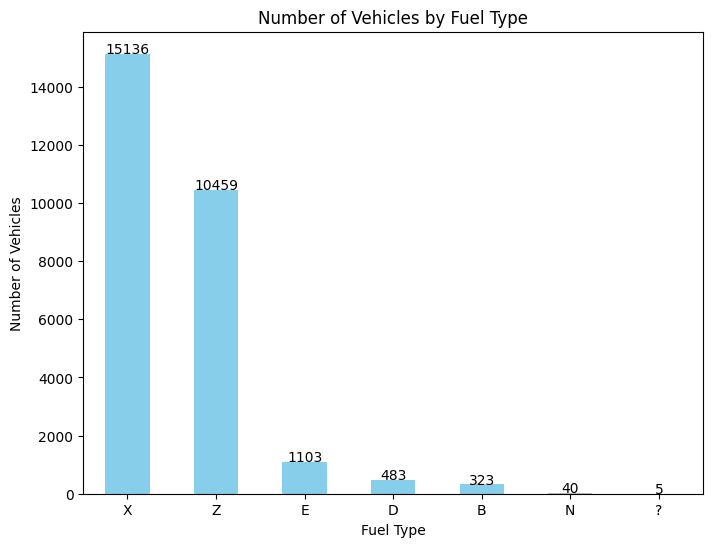

In [8]:
fuel_type_counts = data['Fuel Type'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
ax = fuel_type_counts.plot(kind='bar', color='skyblue')
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
for i, count in enumerate(fuel_type_counts):
    ax.text(i, count + 0.1, str(count), ha='center')
plt.show()

In [9]:
data_Make = data['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Make'})[0:25]

fig = go.Figure(go.Bar(x=data_Make['Make'],y=data_Make['count'],
                marker={'color': data_Make['count'],
                'colorscale': 'Plasma'},
                text=data_Make['count'],
                textposition = "outside"))
fig.update_layout(title_text='Car Make',xaxis_title="Company",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [10]:
fig = px.histogram(data, x="Cylinders")
fig.update_traces(text=fig.data[0].y, textposition='outside')
fig.update_layout(
    title='Cylinders',
    xaxis_title='Size',
    yaxis_title='Number Of Vehicles',
    title_x=0.5
)
fig.show()

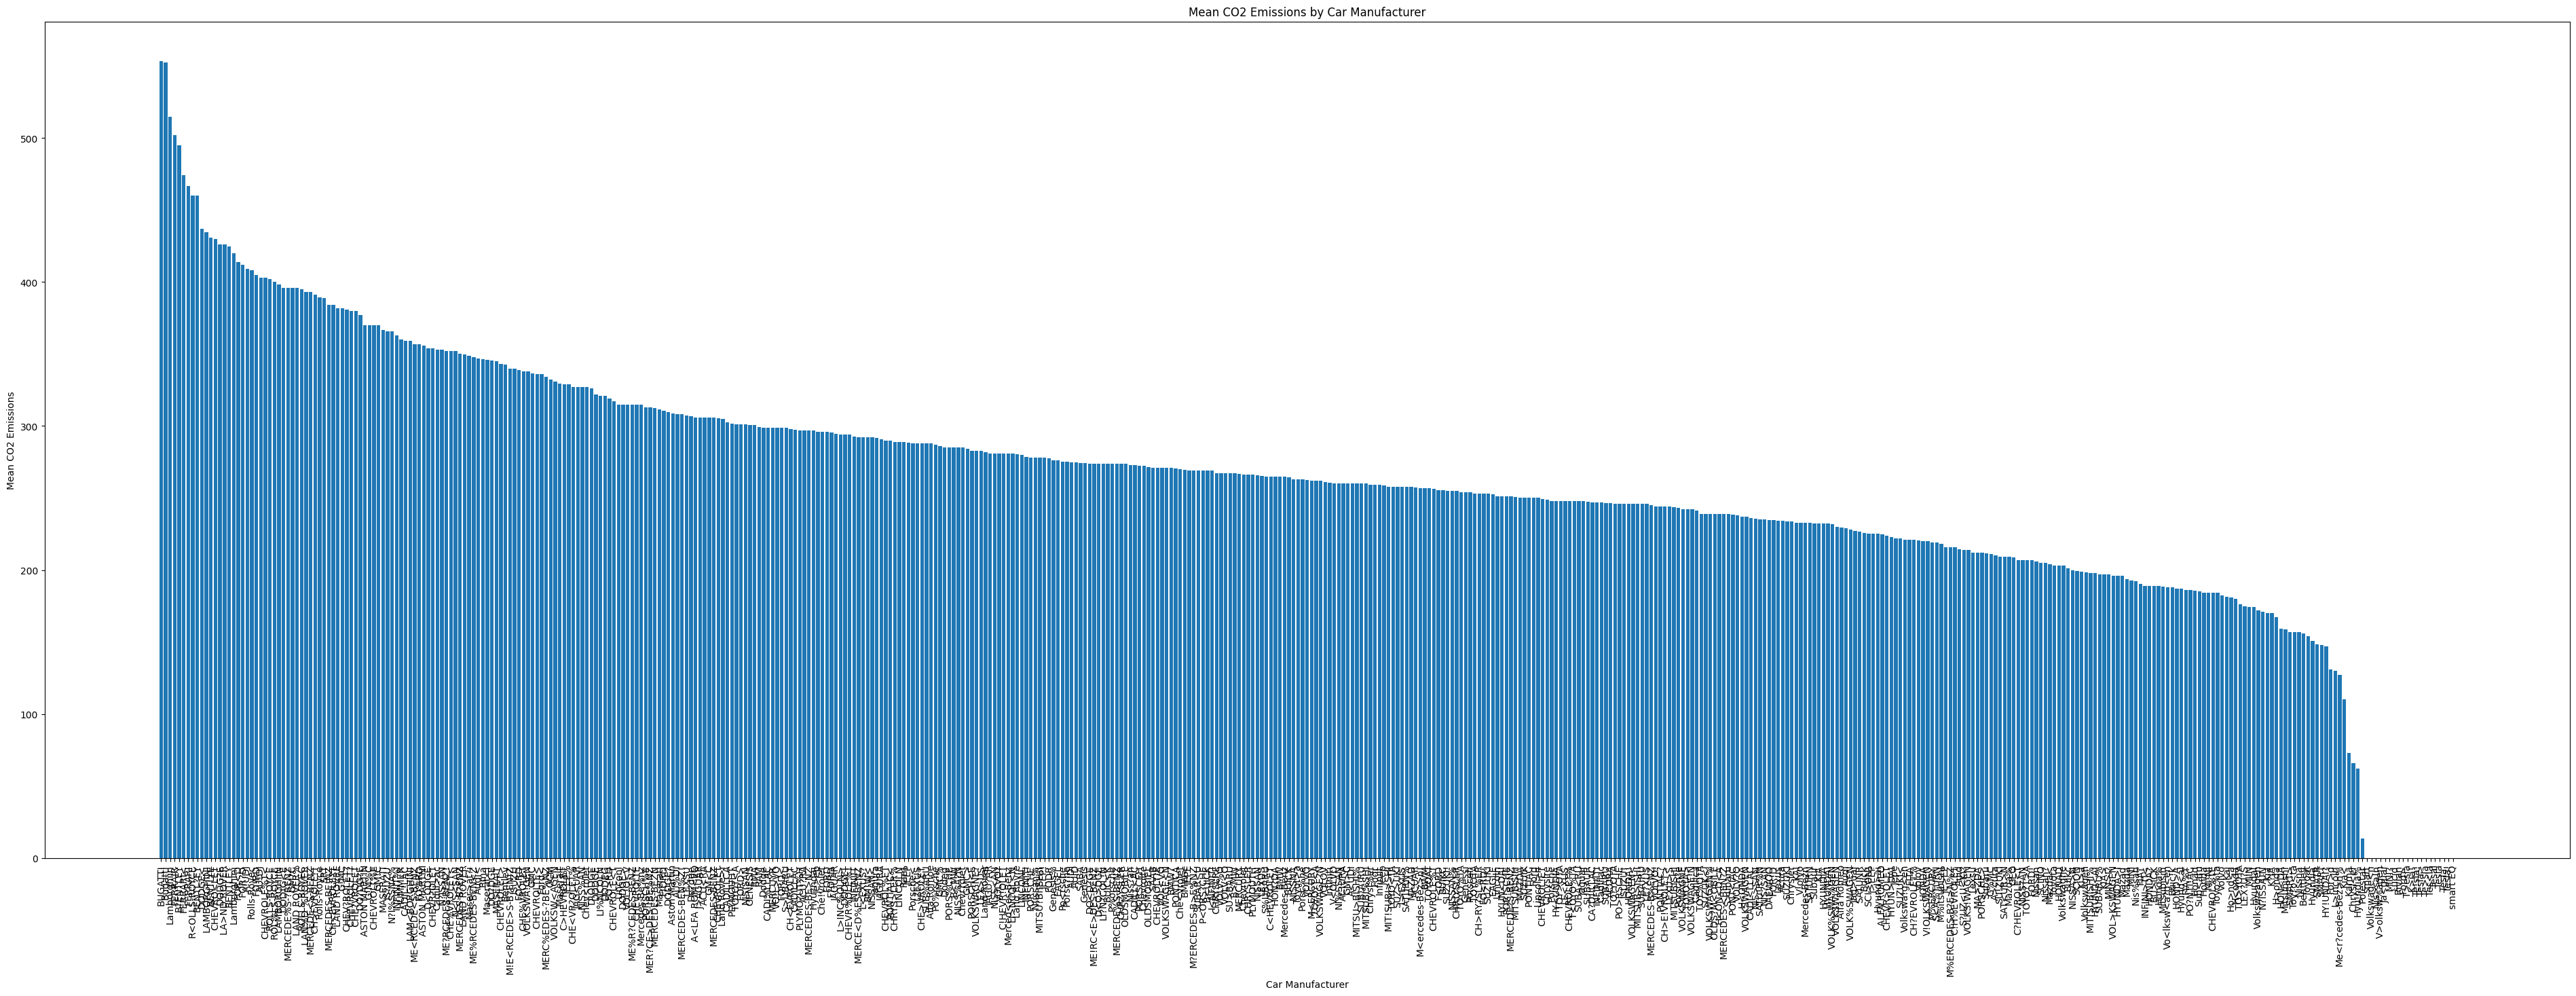

In [11]:
plt.figure(figsize = (48, 16))
mean_data_by_make = data.groupby('Make')['CO2 Emissions (g/km)'].mean().sort_values(ascending=False)
plt.bar(mean_data_by_make.index, mean_data_by_make) # the indexes are the unique car makes
plt.title("Mean CO2 Emissions by Car Manufacturer")
plt.xlabel("Car Manufacturer")
plt.ylabel("Mean CO2 Emissions")
plt.xticks(rotation = 90)  # rotate x-axis labels
plt.show()

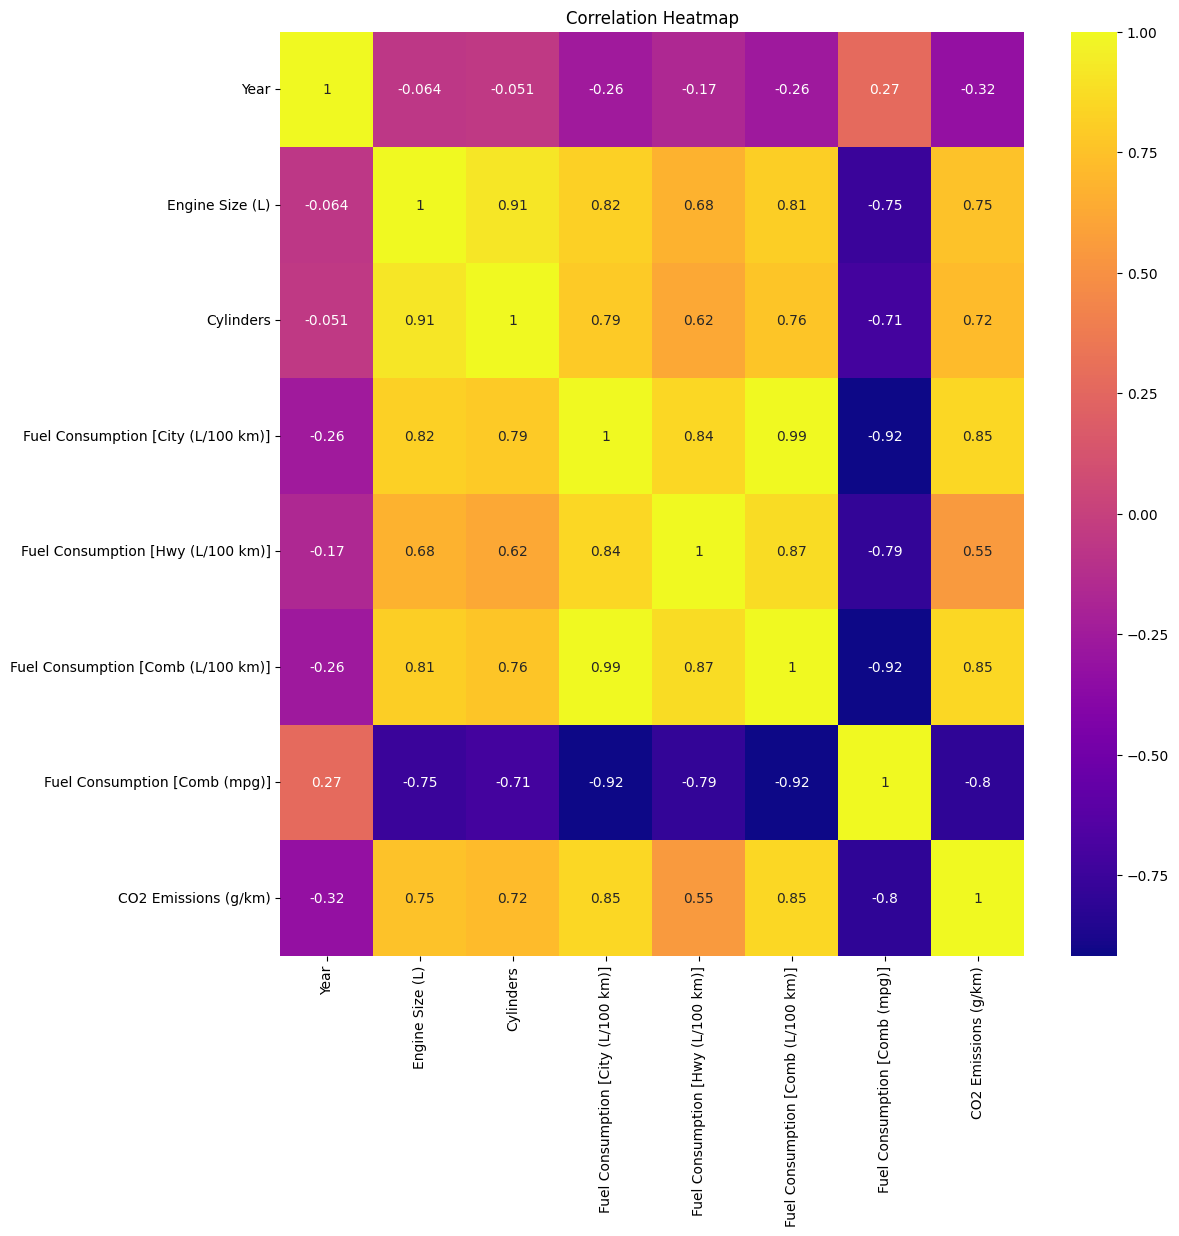

In [12]:
# heatmap to see the correlations between numeric values
numeric_columns = data.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap = 'plasma', annot = True)
plt.title('Correlation Heatmap')
plt.show()

Cylinders, Engine size and Fuel Consumption seems to have a high correleation to tailpipe CO2 Emissions g/hm

In [13]:
data.describe(include=['O'])

,Make,Model,Fuel Type
count,27549,27549,27549
unique,507,5435,7
top,CHEVROLET,MUSTANG,X
freq,2056,112,15136


Determining if the data is normally distributed

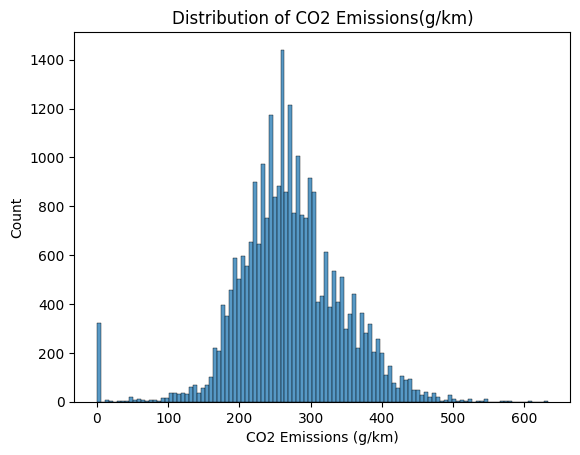

In [14]:
sns.histplot(x = data['CO2 Emissions (g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)')
plt.show()

The data aappears to be normally distributed. There are some outliers

In [15]:
Q1 = data['CO2 Emissions (g/km)'].quantile(0.25)
Q3 = data['CO2 Emissions (g/km)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR   # can adjust these multipliers
upper_bound = Q3 + 1.5 * IQR

result = data[(data['CO2 Emissions (g/km)'] >= lower_bound) & (data['CO2 Emissions (g/km)'] <= upper_bound)]

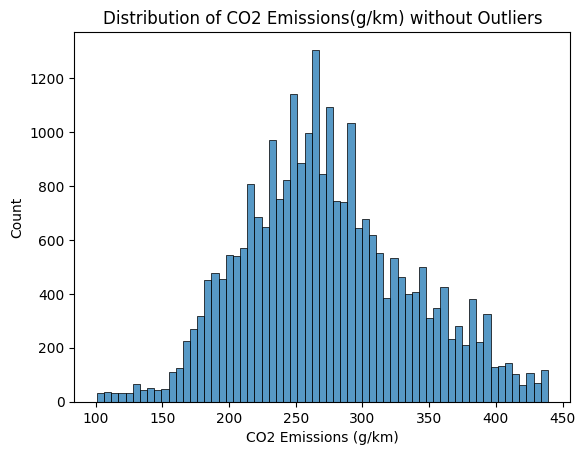

In [16]:
sns.histplot(x=result['CO2 Emissions (g/km)'])
plt.title('Distribution of CO2 Emissions(g/km) without Outliers')
plt.show()

With this, we have removed some outliers using the Interquartile Range method.

In [17]:
data_encoded = pd.get_dummies(result, columns=['Fuel Type'])
data_encoded.head()

,Year,Make,Model,Engine Size (L),Cylinders,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],Fuel Consumption [Comb (L/100 km)],Fuel Consumption [Comb (mpg)],CO2 Emissions (g/km),Fuel Type_?,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2022.0,Acura,ILX,2.4,4.0,9.9,7.0,8.6,33.0,200.0,False,False,False,False,False,True
1,2022.0,Acura,MDX SH-AWD,3.5,6.0,12.6,9.4,11.2,25.0,263.0,False,False,False,False,False,True
2,2022.0,Acura,MDX Type S,3.0,6.0,13.8,11.2,12.4,23.0,291.0,False,False,False,False,False,True
3,2022.0,Acura,NSX,3.5,6.0,11.1,10.8,11.0,26.0,256.0,False,False,False,False,False,True
4,2022.0,Acura,RDX SH-AWD,2.0,4.0,11.0,8.6,9.9,29.0,232.0,False,False,False,False,False,True


In [18]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 0 to 27548
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                26744 non-null  float64
 1   Make                                26744 non-null  object 
 2   Model                               26744 non-null  object 
 3   Engine Size (L)                     26744 non-null  float64
 4   Cylinders                           26744 non-null  float64
 5   Fuel Consumption [City (L/100 km)]  26744 non-null  float64
 6   Fuel Consumption [Hwy (L/100 km)]   26744 non-null  float64
 7   Fuel Consumption [Comb (L/100 km)]  26744 non-null  float64
 8   Fuel Consumption [Comb (mpg)]       26744 non-null  float64
 9   CO2 Emissions (g/km)                26744 non-null  float64
 10  Fuel Type_?                         26744 non-null  bool   
 11  Fuel Type_D                         26744 non-

In [19]:
# Drop rows with any missing values
data_encoded.dropna(inplace=True)
data_encoded = data_encoded.drop(['Model', 'Make'], axis=1)

Creating the LinearRegression model now

In [20]:
X = data_encoded.drop('CO2 Emissions (g/km)', axis=1)  # Features
y = data_encoded['CO2 Emissions (g/km)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 57.596795676554315
Root Mean Squared Error: 7.589255278125405
R-squared: 0.9852625519896645


In [22]:
model.score(X_train, y_train)

0.9845056971773616

Using KNN:

In [23]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # 5 for now
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
knn_regressor.score(X_train, y_train)

Mean Squared Error: 12.79246380424171
Root Mean Squared Error: 3.57665539355439
R-squared: 0.9967267576603076


0.9977363639679127

Using Random Forest

In [25]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
random_forest_regressor.score(X_train, y_train)

Mean Squared Error: 1.0978229966633677
Root Mean Squared Error: 1.047770488543826
R-squared: 0.9997190970583028


0.9998931656448946